In [1]:
import pandas as pd

train=pd.read_csv('/content/semi_cleaned_train.csv')
test=pd.read_csv('/content/semi_cleaned_test.csv')

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [2]:
train.shape, test.shape

((1460, 76), (1459, 75))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##**Data Type Conversion**

In [4]:
# تحويل أعمدة أرقام هي في الحقيقة فئات
cols_int_to_cat = ['MSSubClass', 'MoSold', 'YrSold']

for col in cols_int_to_cat:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [5]:
# تحويل الأعمدة الفئوية/ثنائية لكائن category
cols_obj_to_cat = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
    'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'
]

for col in cols_obj_to_cat:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')


In [6]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"--- {col} ---")
    print(train[col].unique())
    print("\n")

--- MSSubClass ---
[60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [20, 30, 40, 45, ..., 120, 160, 180, 190]


--- MSZoning ---
['RL', 'RM', 'C (all)', 'FV', 'RH']
Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']


--- Street ---
['Pave', 'Grvl']
Categories (2, object): ['Grvl', 'Pave']


--- LotShape ---
['Reg', 'IR1', 'IR2', 'IR3']
Categories (4, object): ['IR1', 'IR2', 'IR3', 'Reg']


--- LandContour ---
['Lvl', 'Bnk', 'Low', 'HLS']
Categories (4, object): ['Bnk', 'HLS', 'Low', 'Lvl']


--- Utilities ---
['AllPub', 'NoSeWa']
Categories (2, object): ['AllPub', 'NoSeWa']


--- LotConfig ---
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Categories (5, object): ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']


--- LandSlope ---
['Gtl', 'Mod', 'Sev']
Categories (3, object): ['Gtl', 'Mod', 'Sev']


--- Neighborhood ---
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', ..., 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Length: 25
Cat

In [7]:
# ---- فصل Features و Target ----
X_train = train.drop(columns=['SalePrice'])  # كل الأعمدة إلا الـ Target
y_train = train['SalePrice']                 # العمود الهدف

# ---- بالنسبة للـ test ----
# لو فيه SalePrice في ملف الاختبار، افصليه كمان
X_test = test.drop(columns=['SalePrice'], errors='ignore')  # errors='ignore' لو ما موجود
y_test = test['SalePrice'] if 'SalePrice' in test.columns else None

# ---- طباعة الشكل للتأكد ----
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
if y_test is not None:
    print("y_test shape:", y_test.shape)

X_train shape: (1460, 75)
y_train shape: (1460,)
X_test shape: (1459, 75)


## **Missing Values**

In [8]:
# @title
import pandas as pd

# ---- Show all columns & rows without truncation ----
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ---- Calculate missing values ----
missing_count = train.isnull().sum()
missing_percentage = (train.isnull().sum() / len(train)) * 100

# ---- Combine into one table ----
missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

# ---- Sort descending by missing percentage ----
missing_table = missing_table.sort_values('Missing Percentage (%)', ascending=False)

# ---- Filter only columns with missing values ----
missing_table = missing_table[missing_table['Missing Count'] > 0]

# ---- Display ----
missing_table

,Missing Count,Missing Percentage (%)
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945
GarageCond,81,5.547945
GarageYrBlt,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740


<Figure size 1200x600 with 0 Axes>

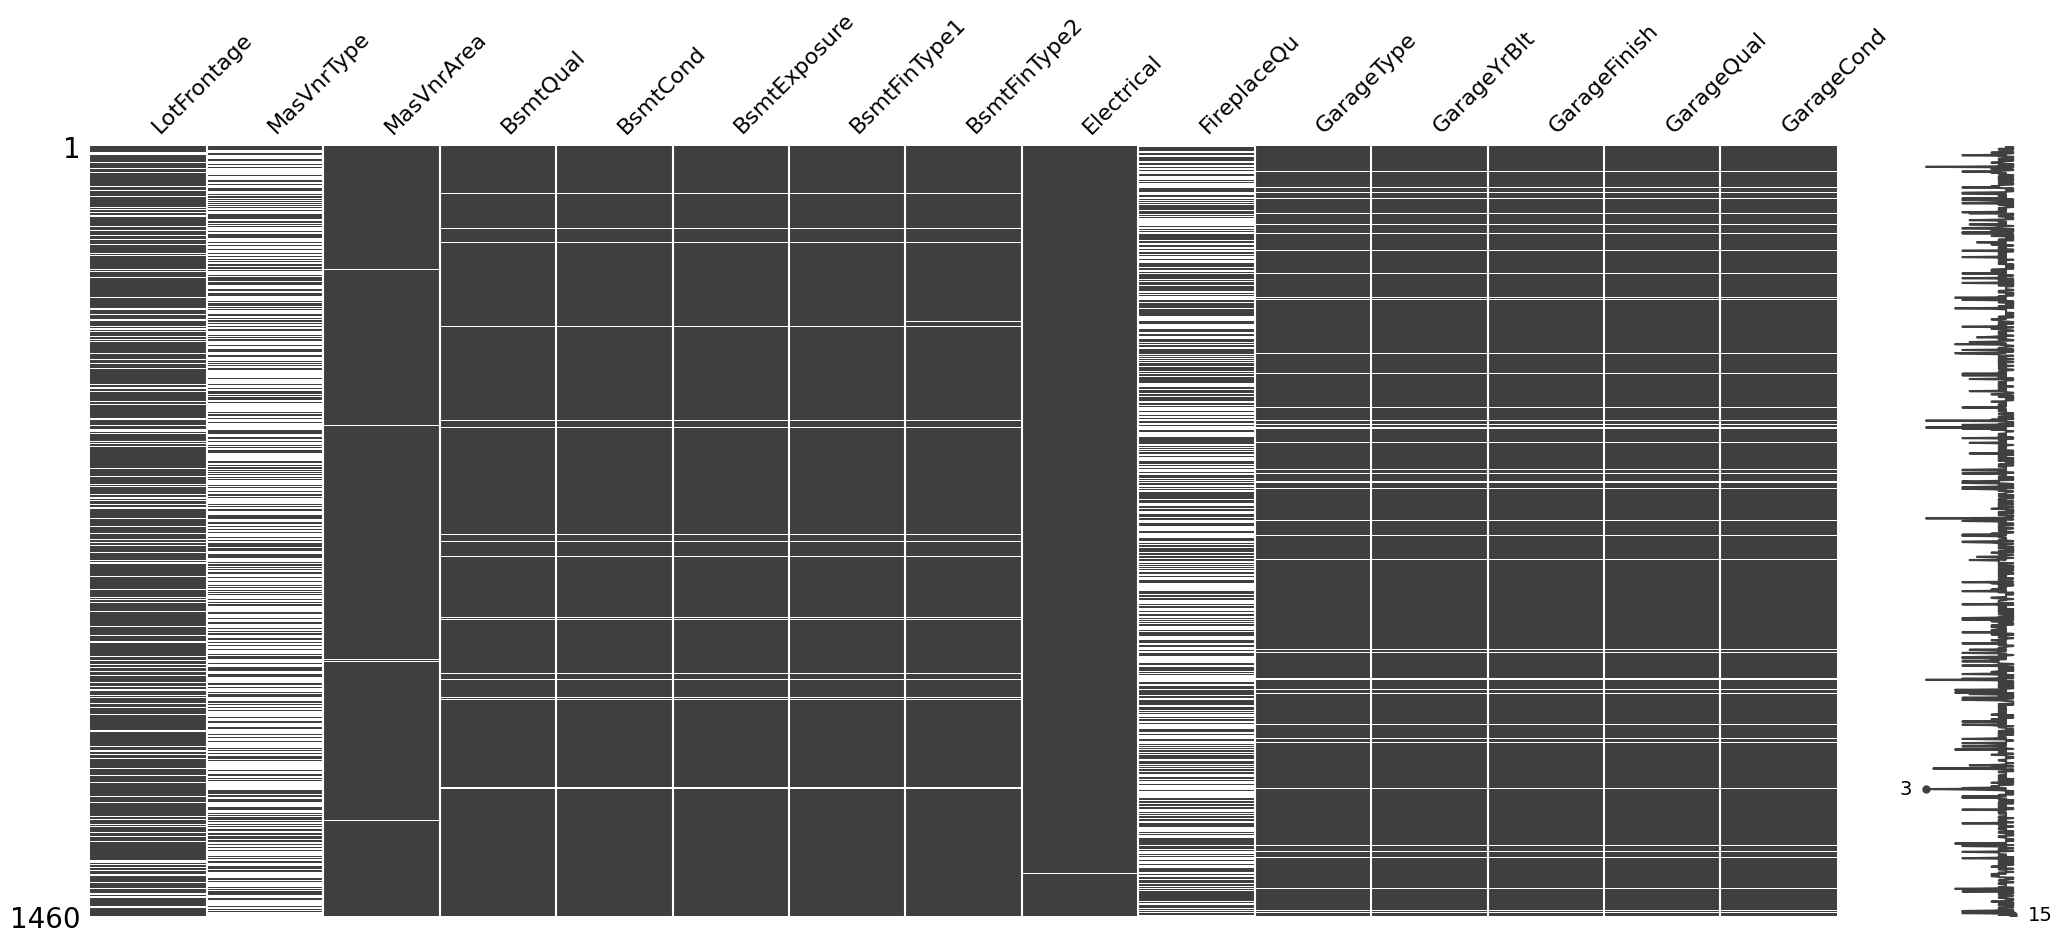

<Figure size 1200x600 with 0 Axes>

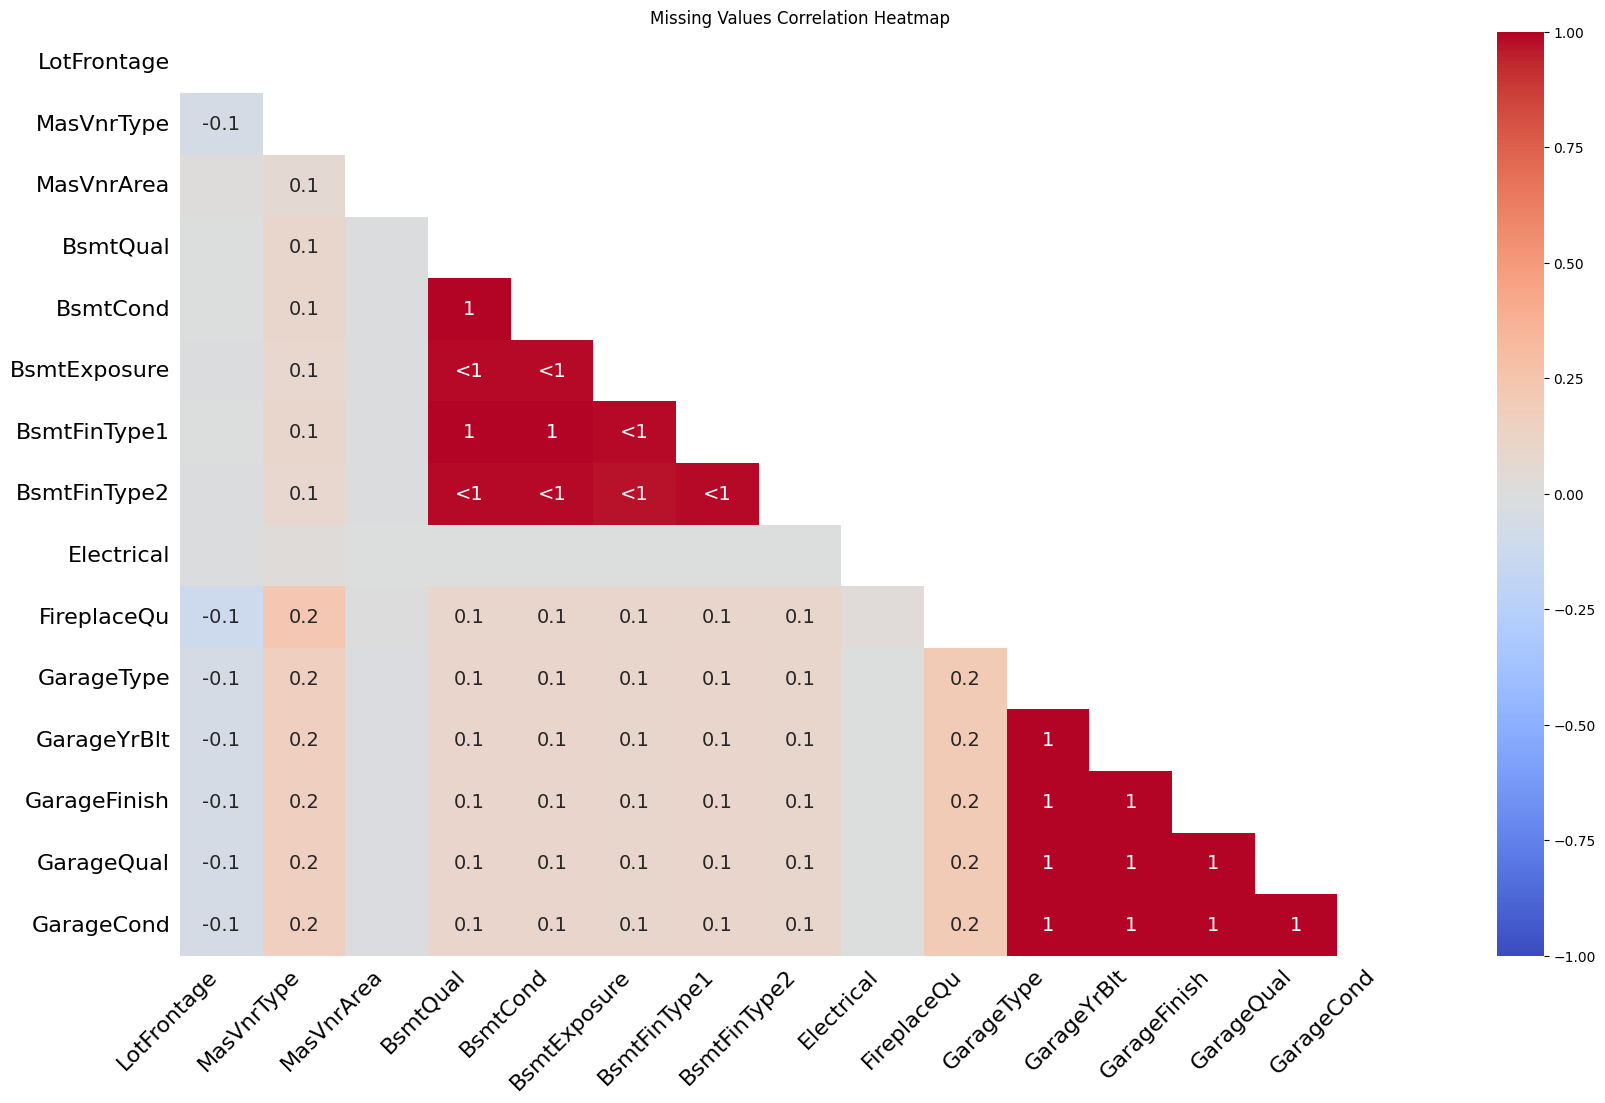

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

# ---- Select only columns with missing values ----
missing_cols = train.columns[train.isnull().any()]
df_missing = train[missing_cols]

# ---- Visualize missing values only for these columns ----
plt.figure(figsize=(12,6))
msno.matrix(df_missing)
plt.show()

# ---- Heatmap of missing values correlation ----
plt.figure(figsize=(12,6))
msno.heatmap(df_missing, cmap='coolwarm')  # cmap optional
plt.title('Missing Values Correlation Heatmap')
plt.show()

In [10]:
import pandas as pd

# ---- Missing info ----
missing_count = X_train.isnull().sum()
missing_percentage = (missing_count / len(X_train)) * 100

# ---- Create summary table ----
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

# ---- Recommended strategy including KNN/Iterative ----
def true_strategy(col):
    # Numerical columns suitable for KNN/Iterative
    num_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

    # Categorical columns with special meaning
    special_cat = {
        'MasVnrType': 'None',
        'FireplaceQu': 'NoFireplace',
        'BsmtQual': 'NoBsmt',
        'BsmtCond': 'NoBsmt',
        'BsmtExposure': 'NoBsmt',
        'BsmtFinType1': 'NoBsmt',
        'BsmtFinType2': 'NoBsmt',
        'GarageType': 'NoGarage',
        'GarageFinish': 'NoGarage',
        'GarageQual': 'NoGarage',
        'GarageCond': 'NoGarage',
        'Electrical': 'Mode'
    }

    if col in num_cols:
        return 'KNN / Iterative Imputer (Numerical)'
    elif col in special_cat:
        return f"Fill with \"{special_cat[col]}\""
    else:
        # Default for small missing categorical columns
        return 'Mode (Categorical)'

# ---- Apply ----
missing_summary['Recommended Strategy'] = missing_summary.index.map(true_strategy)

# ---- Filter only columns with missing values ----
missing_summary_sorted = missing_summary[missing_summary['Missing Count'] > 0] \
    .sort_values(by='Missing Percentage (%)', ascending=False) \
    .reset_index()  # إعادة تعيين الفهرس ليكون مرتب

# ---- عرض الجدول النهائي ----
missing_summary_sorted


,index,Missing Count,Missing Percentage (%),Recommended Strategy
0,MasVnrType,872,59.726027,"Fill with ""None"""
1,FireplaceQu,690,47.260274,"Fill with ""NoFireplace"""
2,LotFrontage,259,17.739726,KNN / Iterative Imputer (Numerical)
3,GarageYrBlt,81,5.547945,KNN / Iterative Imputer (Numerical)
4,GarageFinish,81,5.547945,"Fill with ""NoGarage"""
5,GarageType,81,5.547945,"Fill with ""NoGarage"""
6,GarageQual,81,5.547945,"Fill with ""NoGarage"""
7,GarageCond,81,5.547945,"Fill with ""NoGarage"""
8,BsmtExposure,38,2.602740,"Fill with ""NoBsmt"""
9,BsmtFinType2,38,2.602740,"Fill with ""NoBsmt"""


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# ---- الأعمدة العددية لKNN ----
num_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# ---- الأعمدة الفئوية الخاصة ----
cat_special_cols = ['MasVnrType', 'FireplaceQu', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical']

cat_special_values = {
    'MasVnrType': 'None',
    'FireplaceQu': 'NoFireplace',
    'BsmtQual': 'NoBsmt',
    'BsmtCond': 'NoBsmt',
    'BsmtExposure': 'NoBsmt',
    'BsmtFinType1': 'NoBsmt',
    'BsmtFinType2': 'NoBsmt',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'Electrical': X_train['Electrical'].mode()[0]
}

# ---- باقي الأعمدة الفئوية ----
cat_cols = X_train.select_dtypes('category').columns.tolist()
cat_cols = [col for col in cat_cols if col not in cat_special_cols]

# ---- 1. معالجة الأعمدة الفئوية الخاصة ----
def fill_special(df, special_dict):
    df_copy = df.copy()
    for col, val in special_dict.items():
        if str(df_copy[col].dtype) == 'category' and val not in df_copy[col].cat.categories:
            df_copy[col] = df_copy[col].cat.add_categories([val])
        df_copy[col] = df_copy[col].fillna(val)
    return df_copy

X_train_filled = fill_special(X_train, cat_special_values)
X_test_filled = fill_special(X_test, cat_special_values)

# ---- 2. معالجة الأعمدة العددية ----
knn_imputer = KNNImputer(n_neighbors=5)
X_train_filled[num_cols] = knn_imputer.fit_transform(X_train_filled[num_cols])
X_test_filled[num_cols] = knn_imputer.transform(X_test_filled[num_cols])

# ---- 3. معالجة باقي الأعمدة الفئوية ----
mode_imputer = SimpleImputer(strategy='most_frequent')
X_train_filled[cat_cols] = mode_imputer.fit_transform(X_train_filled[cat_cols])
X_test_filled[cat_cols] = mode_imputer.transform(X_test_filled[cat_cols])

# ---- 4. معالجة أي missing متبقي في X_test (لو فيه) بالأعمدة العددية ----
remaining_num_missing = X_test_filled[num_cols].isnull().any()
if remaining_num_missing.any():
    median_imputer = SimpleImputer(strategy='median')
    X_test_filled[num_cols] = median_imputer.fit_transform(X_test_filled[num_cols])

# ---- التأكد النهائي ----
print("Missing values in X_train:", X_train_filled.isnull().sum().sum())
print("Missing values in X_test:", X_test_filled.isnull().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 10


In [13]:
from sklearn.impute import SimpleImputer

# معالجة أي missing متبقي في X_test بالأعدادية
num_cols_remaining = X_test_filled.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
X_test_filled[num_cols_remaining] = num_imputer.fit_transform(X_test_filled[num_cols_remaining])

# معالجة أي missing متبقي في X_test للفئوية
cat_cols_remaining = X_test_filled.select_dtypes(include=['category']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_test_filled[cat_cols_remaining] = cat_imputer.fit_transform(X_test_filled[cat_cols_remaining])

# التأكد النهائي
print("Missing values in X_train:", X_train_filled.isnull().sum().sum())
print("Missing values in X_test:", X_test_filled.isnull().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 0


In [15]:
# ---- Save X_train_filled and X_test_filled ----
X_train_filled.to_csv('X_train_filled.csv', index=False)
X_test_filled.to_csv('X_test_filled.csv', index=False)

# ---- Optional: save y_train----
y_train.to_csv('y_train.csv', index=False)